In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_train = pd.read_csv('../data/data_train.csv')
df_valid = pd.read_csv('../data/data_valid.csv')
df_test = pd.read_csv('../data/data_test.csv')
df = pd.concat([df_train, df_test, df_valid])
df.head()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,patientid,sex,age,ANA,EXA,...,OP_text,OP_code,EXA_formatted,EXA_interpreted,label,data,data2,original_data,keywords_prep,keywords
0,0,0,0,0,0,69318.0,NaN,NaN,NaN,li. Knie: 0-5-130; kein Erguss; Lachman + unsi...,...,Arthroskopische Operation am Gelenkknorpel und...,5-812.6,links knie keine überstreckung des knies strec...,Mein linkes Knie kann nicht überstreckt werden...,other-minor,. Mein linkes Knie kann nicht überstreckt werd...,. Mein linkes Knie kann nicht überstreckt werd...,li. Knie: 0-5-130; kein Erguss; Lachman + u...,. Mein linkes Knie kann nicht_überstreckt werd...,mein linkes knie kann nicht_überstreckt werden...
1,1,1,1,1,1,10685.0,male,35.0,Geht sehr gut nach LCA-Plastik. Score liegt be...,re Knie: volle Streckung; geringer Erguß; DS ü...,...,NaN,NaN,"geringer erguß, druckschmerz über med seite de...",Mein Knie hat einen geringen Erguß und es gibt...,meniskus-urgent,35.0 Jahre alt männlich Geht sehr gut nach LCA...,Geht sehr gut nach LCA-Plastik. Score liegt be...,35.0 male Geht sehr gut nach LCA-Plastik. Scor...,35.0 Jahre alt männlich Geht sehr gut nach LCA...,mein knie hat einen geringen erguß und es gibt...
2,2,2,2,2,2,58655.0,male,49.0,Der Patient stellt sich Präop zur Kontrolle vor.,li. Knie: Haselnuss großer freier Gelenkkörper...,...,Arthroskopische Gelenkoperation: Entfernung fr...,5-810.4h,NaN,NaN,other-minor,49.0 Jahre alt männlich Der Patient stellt sic...,Der Patient stellt sich Präop zur Kontrolle vo...,49.0 male Der Patient stellt sich Präop zur Ko...,49.0 Jahre alt männlich Der Patient stellt sic...,0 jahre alt männlich der patient stellt sich p...
3,3,3,3,3,3,39029.0,NaN,NaN,NaN,Befund NMR rechtes Kniegelenk: Innenmeniskusde...,...,NaN,NaN,"-erguß, druckschmerz med seite des kniegelenks",Mein Knie hat einen Erguß und es gibt Schmerze...,other-minor,. Mein Knie hat einen Erguß und es gibt Schmer...,. Mein Knie hat einen Erguß und es gibt Schmer...,Befund NMR rechtes Kniegelenk: Innenmenisku...,. Mein Knie hat einen Erguß und es gibt Schmer...,mein knie hat einen erguß und es gibt schmerze...
4,4,4,4,4,4,75970.0,NaN,NaN,NaN,li.Knie: 0-0-135; Beugung endgradig schmerzhaf...,...,Arthroskopische Operation am Gelenkknorpel und...,5-812.5,liknie keine überstreckung des knies kein stre...,Mein linkes Knie kann nicht überstreckt werden...,meniskus-minor,. Mein linkes Knie kann nicht überstreckt werd...,. Mein linkes Knie kann nicht überstreckt werd...,li.Knie: 0-0-135; Beugung endgradig schmerz...,. Mein linkes Knie kann nicht_überstreckt werd...,mein knie hat eine schwellung und es gibt schm...


In [22]:
meniskus = [
    "M23.3",
    "S83.2", # Rupture
]
meniskus_low = [
    "M23.0", # Ganglion doesn't seem to urgent
    "M23.1", # something you have from birth
    "M23.2", # problems because of old rupture
    "M23.9"  # Same as M23.8
]
cruciate = [
    "M23.6", # Ruptur
    "S83.50", # might be rupture
    "S83.53", # Rupture
    "S83.54", # Rupture
    "S83.7" # Multiple areas
]
cruciate_low = [
    "M23.8", # Seems to be no rupture, rather weakness, still operations
    "S83.51", # Distorsion
    "S83.52", # Distorsion
]
other_urgent = [
    "S83.3" # Rupture Kniegelenkknorpel
    "S83.4" # Rupture Seitenband
]
other = [
    "M17",
    "M22",  
    "M23.4", # Freikörper, does have a lot of operations
    "M23.5", # instability
    "S83.1", # Only luxation
    "S83.6" # Distorsion somewhere
]

In [23]:
def createLabel(code):
    if any(elem in code for elem in meniskus):
        return "meniskus_urgent"
    elif any(elem in code for elem in meniskus_low):
        return "meniskus_low"
    elif any(elem in code for elem in cruciate):
        return "cruciate_urgent"
    elif any(elem in code for elem in cruciate_low):
        return "cruciate_low"
    elif any(elem in code for elem in other_urgent):
        print("2")
        return "other_urgent"
    elif any(elem in code for elem in other):
        return "other_minor"
    else:
        return "other_minor"
    
df['label3'] = df['DIA_code'].apply(createLabel)

In [21]:
df.label.unique()

array(['other-minor', 'meniskus-urgent', 'meniskus-minor',
       'cruciate-ligament-urgent', 'cruciate-ligament-minor'],
      dtype=object)

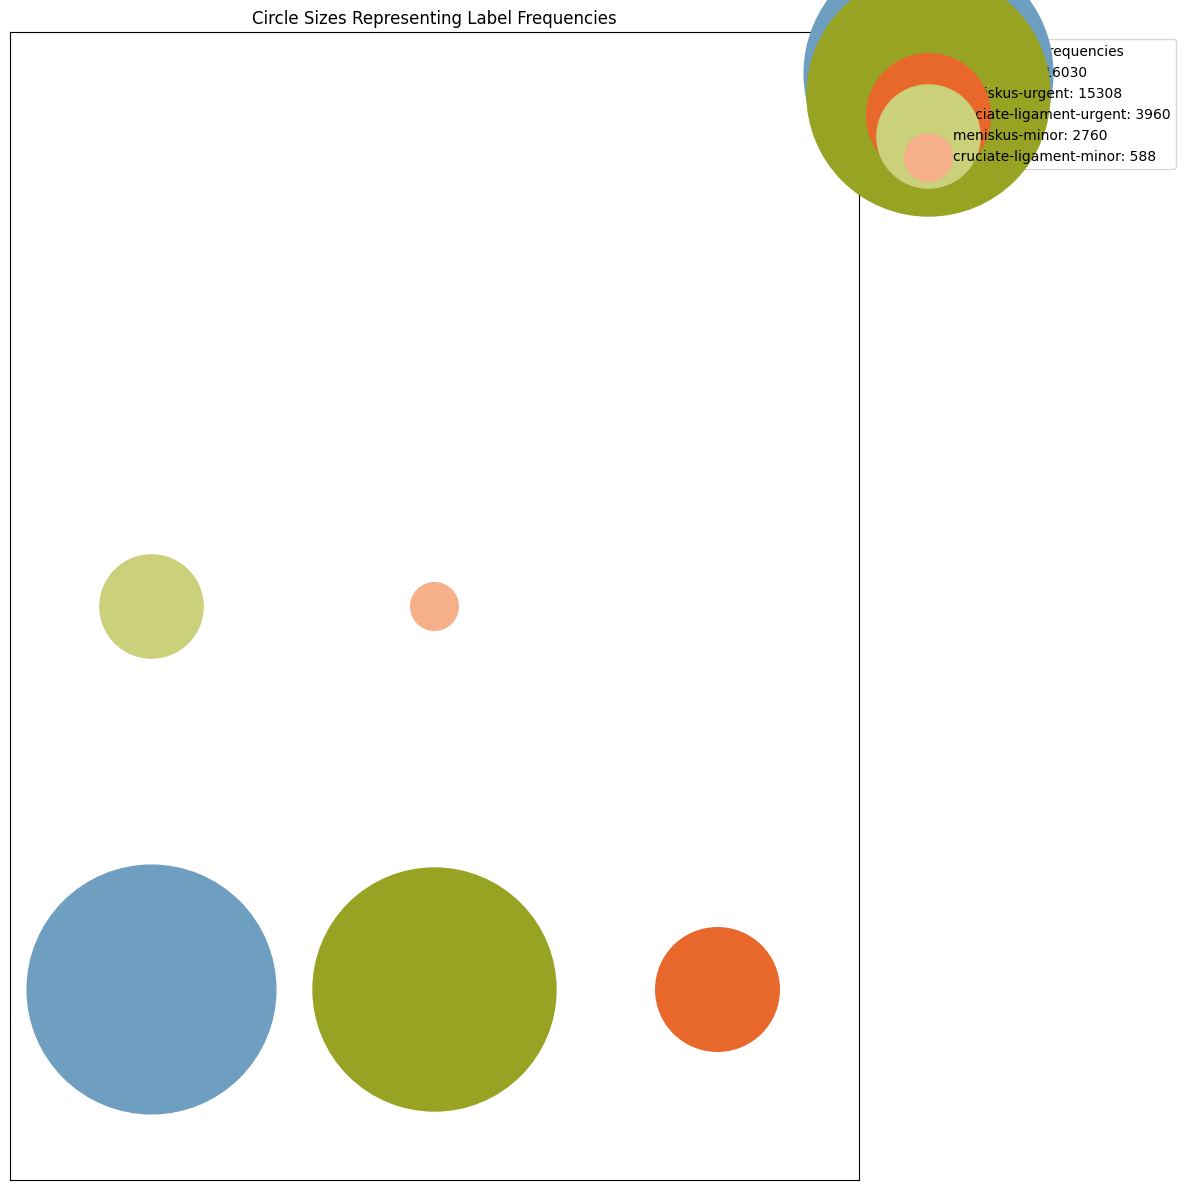

In [26]:
import numpy as np
label_counts = df['label'].value_counts()

# Define custom colors for each label using hex codes
colors = {
    'meniskus-urgent': '#98A323',  # Red
    'meniskus-minor': '#CBD07A',  # Blue
    'cruciate-ligament-urgent': '#E8672B',  # Green
    'cruciate-ligament-minor': '#F5B089',  # Purple
    'other-urgent': '#004985',  # Orange
    'other-minor': '#6E9FC0'   # Yellow
}

# Create grid positions with spacing to accommodate circle size
num_labels = len(label_counts)
grid_size = int(np.ceil(np.sqrt(num_labels)))
positions = [(x, y) for y in range(grid_size) for x in range(grid_size)]

# Creating the plot with a larger size and adjusted margins
fig, ax = plt.subplots(figsize=(12, 12))
for (x, y), label in zip(positions, label_counts.index):
    ax.scatter(x, y, s=label_counts[label]*2, color=colors.get(label, '#808080'), 
               label=f'{label}: {label_counts[label]}', alpha=1)

# Adjust the margins
margin = 0.5  # Can adjust as needed
ax.set_xlim(-margin, grid_size - 1 + margin)
ax.set_ylim(-margin, grid_size - 1 + margin)

# Hide ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Adding a legend and title
ax.legend(title='Labels and Frequencies', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Circle Sizes Representing Label Frequencies')

plt.tight_layout()

# Save the figure as an SVG file
plt.savefig('./Circle_Plot.svg', format='svg')

plt.show()

